In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from statsmodels.tsa.api import ExponentialSmoothing
from sklearn.metrics import mean_squared_error, mean_absolute_error
from math import sqrt

In [2]:
df=pd.read_excel('http://taanila.fi/CO2.xlsx')
df.index = pd.to_datetime(df['Kuukausi'],format="%Y-%m")
df=df.drop('Kuukausi',axis=1)
df.head()

,CO2
Kuukausi,
1999-12-01,368.04
2000-01-01,369.25
2000-02-01,369.50
2000-03-01,370.56
2000-04-01,371.82


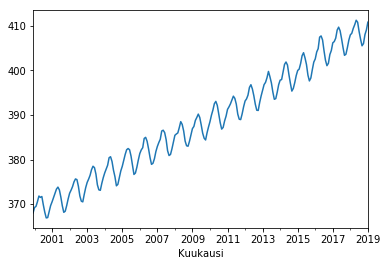

In [3]:
df['CO2'].plot()
#Materiaalissa on selkeä trendi ja kausittaista vaihtelua, joten käytetään Holt-Winterin menetelmää.

C:\Users\SJP\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\SJP\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:191: FutureWarning: Creating a DatetimeIndex by passing range endpoints is deprecated.  Use `pandas.date_range` instead.
  start=index[0], end=index[-1], freq=freq)


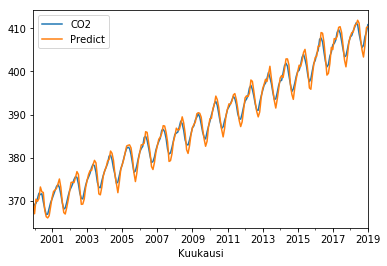

In [4]:
fit1 = ExponentialSmoothing(df['CO2'], seasonal_periods=4 , trend='add', seasonal='mul').fit()
df['Predict']=fit1.fittedvalues
df.plot()

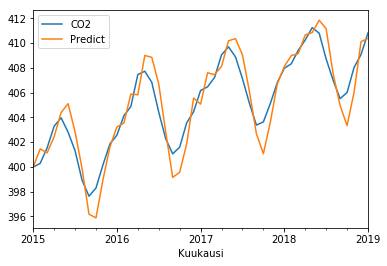

In [5]:
df['2015-01-01':].plot() #Sama, mutta zoomattuna 2015 vuoden alusta.

In [6]:
sqrt(mean_squared_error(df['CO2'], df['Predict']))

1.2004864290408126

In [7]:
mean_absolute_error(df['CO2'], df['Predict'])

0.9899977913502295

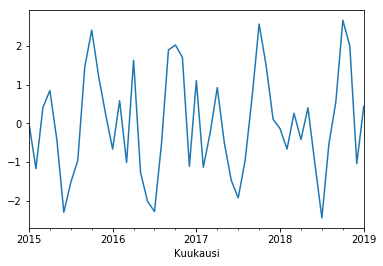

In [9]:
df['Resid']= fit1.resid
df['Resid']['2015-01-01':].plot()

C:\Users\SJP\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:322: FutureWarning: Addition/subtraction of integers and integer-arrays to Timestamp is deprecated, will be removed in a future version.  Instead of adding/subtracting `n`, use `n * self.freq`
  start = self.model._index[-1] + 1
C:\Users\SJP\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:323: FutureWarning: Addition/subtraction of integers and integer-arrays to Timestamp is deprecated, will be removed in a future version.  Instead of adding/subtracting `n`, use `n * self.freq`
  end = self.model._index[-1] + steps
C:\Users\SJP\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:336: FutureWarning: Creating a DatetimeIndex by passing range endpoints is deprecated.  Use `pandas.date_range` instead.
  freq=base_index.freq)


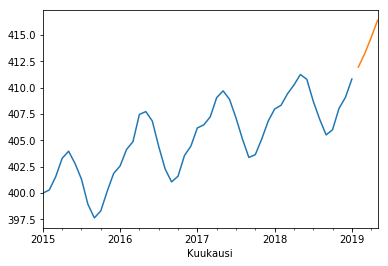

In [47]:
datapr = pd.DataFrame(fit1.forecast(4))
datapr.columns=['Predict']
df['CO2']['2015-01-01':].plot()
datapr['Predict'].plot()

In [44]:
fit1.params

{'smoothing_level': 0.8947373252714415,
 'smoothing_slope': 0.8421056541570995,
 'smoothing_seasonal': 0.10526267218538923,
 'damping_slope': nan,
 'initial_level': 388.20620439634314,
 'initial_slope': 0.4712498480963935,
 'initial_seasons': array([0.95103436, 0.95007314, 0.9514981 , 0.95197299]),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

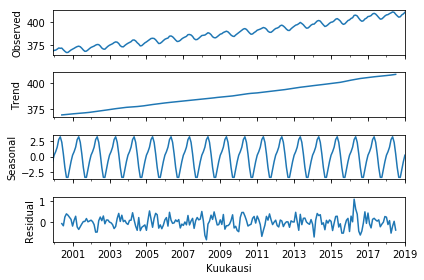

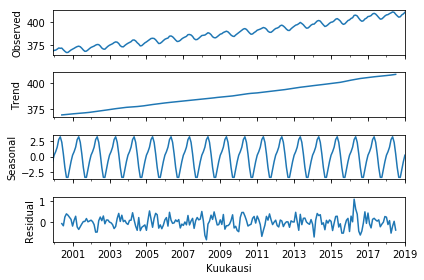

In [48]:
from statsmodels.tsa.api import seasonal_decompose
seasonal_decompose(df['CO2']).plot()

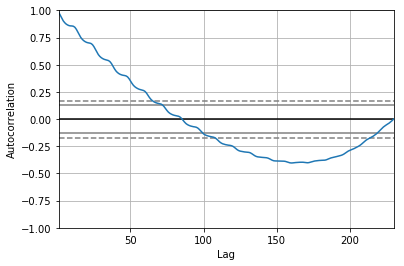

In [49]:
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(df['CO2'])